### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

#### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
url = "https://github.com/anhailing/python-fundamentals/tree/main/31%20-%20Matplotlib/06%20-%20Exercises/daily_quotes.csv"

url = "https://github.com/anhailing/python-fundamentals/blob/main/31%20-%20Matplotlib/06%20-%20Exercises/daily_quotes.csv"

url = "C:/Users/hahy/Downloads/daily_quotes.csv"

In [52]:
# mpl.style.available

In [80]:
df = pd.read_csv(url, index_col=1, parse_dates=True)
df.columns = [col.strip() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2021-02-12 to 2020-08-13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      508 non-null    object 
 1   Close/Last  508 non-null    float64
 2   Volume      508 non-null    int64  
 3   Open        508 non-null    float64
 4   High        508 non-null    float64
 5   Low         508 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 27.8+ KB


C:\Users\hahy\AppData\Local\Temp\ipykernel_24880\3791191950.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, index_col=1, parse_dates=True)


### Q1

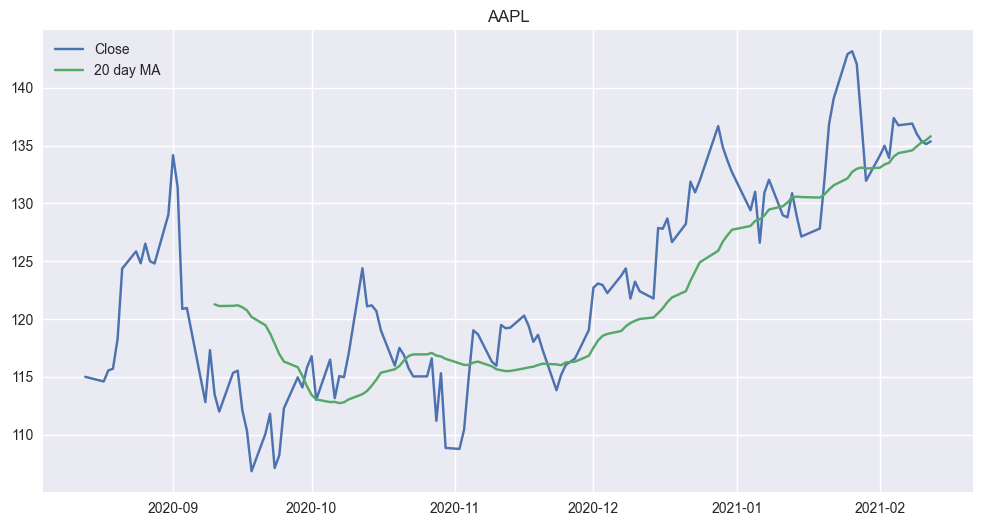

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))
sym = "AAPL"
df_sub = df[df['Symbol'] == sym]
df_sub = df_sub.sort_index()
col = 'Close/Last'
ax.plot(df_sub[col], label='Close')
ax.set_title(sym)
# add n day moving average
n = 20
ax.plot(df_sub[col].rolling(n).mean(), label=f'{n} day MA')
ax.legend()
None

In [81]:
plt.rcParams["figure.figsize"] = (18, 6)

In [86]:
def add_chart(df, sym, col, ax, n=None):
    df_sub = df[df['Symbol'] == sym]
    df_sub = df_sub.sort_index()
    ax.plot(df_sub[col], label=col)
    ax.set_title(sym)
    if n:
        add_mva(df_sub, col, n, ax)

def add_mva(df, col, n, ax):
    ax.plot(df[col].rolling(n).mean(), label=f'{n} day MA')
    ax.legend()
    

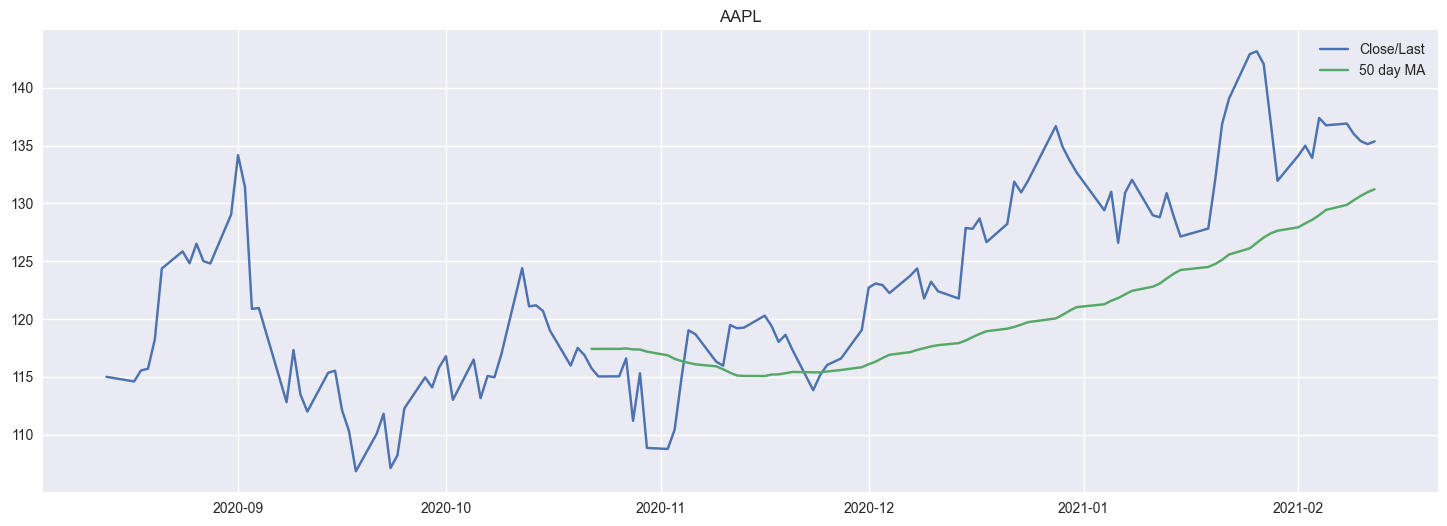

In [90]:
fig, ax = plt.subplots()
add_chart(df, 'AAPL', 'Close/Last', ax, n=50)

In [69]:
symbols = df.Symbol.unique()
num_rows = len(symbols)//2 + len(symbols)%2

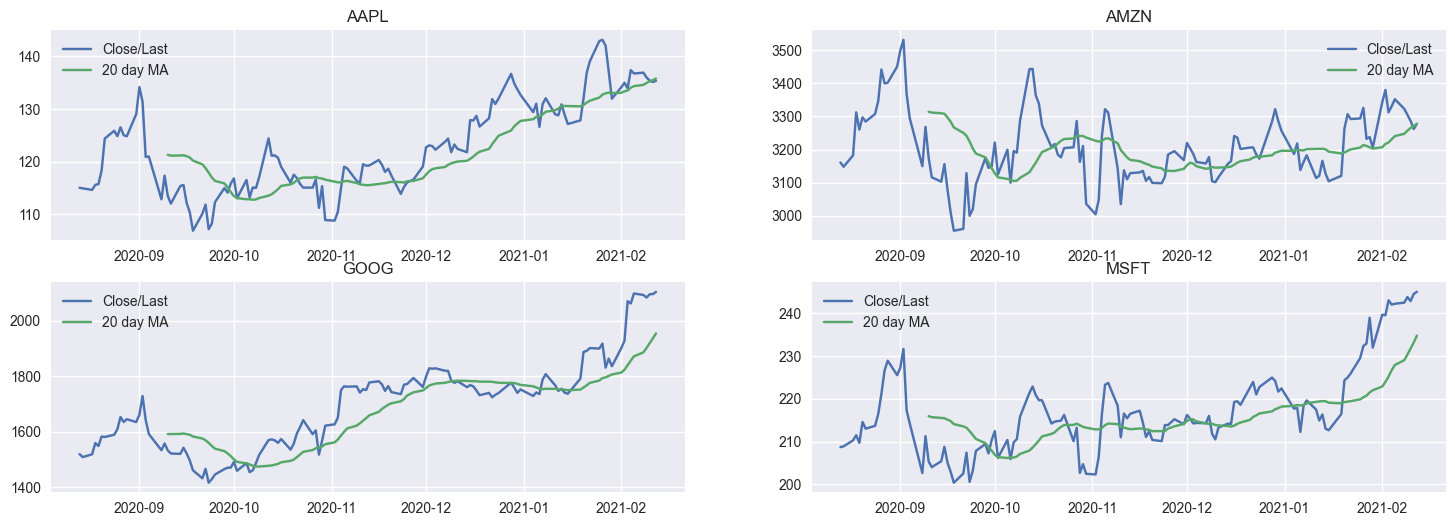

In [93]:
fig, axes = plt.subplots(num_rows, 2)
axes = axes.flatten()
for ax, sym in zip(axes, symbols):
    add_chart(df, sym, 'Close/Last', ax, n=20)

In [95]:
def chart_symbols(df, col="Close/Last", num_cols=2, mva=None):
    symbols = df.Symbol.unique()
    num_rows = len(symbols)//num_cols + len(symbols)%num_cols
    fig, axes = plt.subplots(num_rows, num_cols)
    axes = axes.flatten()
    for ax, sym in zip(axes, symbols):
        add_chart(df, sym, col, ax, n=mva)
        

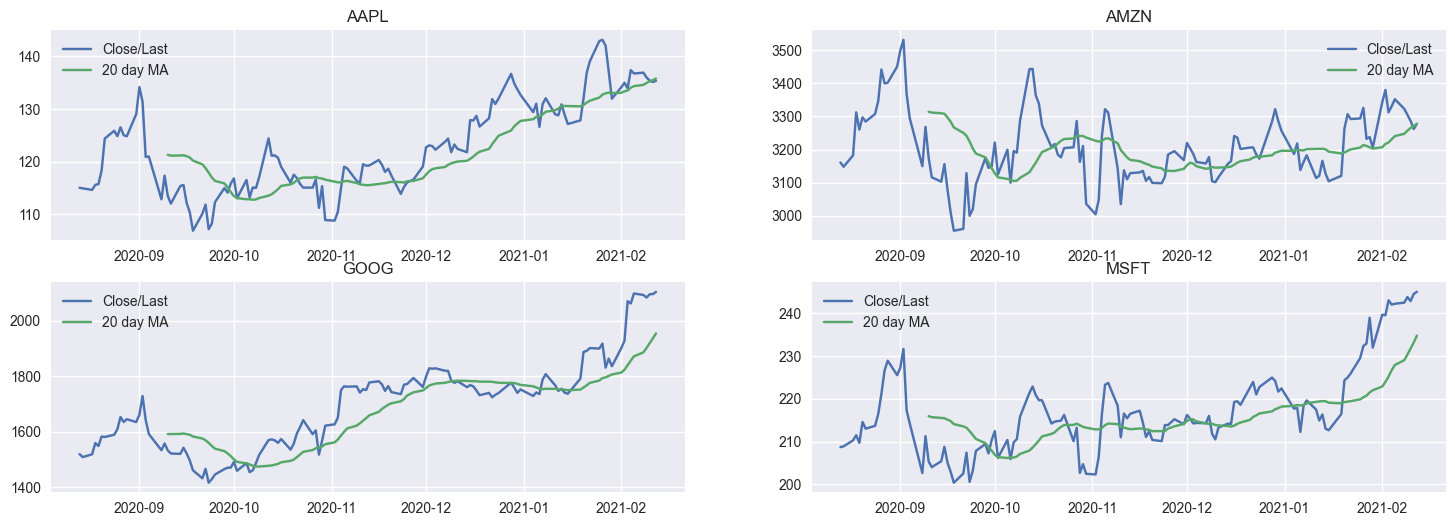

In [99]:
chart_symbols(df, col="Close/Last", num_cols=2, mva=20)